In [20]:
import os
import os.path as osp

import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt

In [2]:
def build_ds_df(label_dir, dset_dist, label_format=['frame_no','class','source_no','azi','ele','dist']):
    all_dfs = []
    for subdir in os.listdir(label_dir):
        if osp.isdir(osp.join(label_dir, subdir)):
            for fold in dset_dist.keys():
                for room in dset_dist[fold]:
                    glob_match = osp.join(label_dir, subdir, f'{fold}_{room}_*.csv')
                    print(f"Checking {glob_match}")
                    files = glob.glob(glob_match)
                    room_data = []
                    for file in files:
                        file = osp.join(label_dir, subdir, file)
                        assert osp.exists(file)
                        file_df = pd.read_csv(file, header=0, names=label_format)
                        room_data.append(file_df)
                    if len(room_data)>0:
                        room_df = pd.concat(room_data, ignore_index=True)
                        room_df['fold'] = fold
                        room_df['room'] = room
                        all_dfs.append(room_df)
                    else:
                        pass
    return pd.concat(all_dfs, ignore_index=True) 

In [17]:
glob.glob("/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_*.csv")

['/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix097.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix038.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix092.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix022.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix050.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix056.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix078.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix047.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix020.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_mix115.csv',
 '/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_m

In [3]:
ss_label_dir = "/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/"

ss_dist = {'fold1':[f'room{i}' for i in range(6)],
             'fold2':[f'room{i}' for i in range(3)]}

ss_df = build_ds_df(ss_label_dir, ss_dist)

Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room0_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room1_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room2_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room3_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room4_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold1_room5_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold2_room0_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold2_room1_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/fold2_room2_*.csv


In [50]:
stars_dir = "/scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev"

stars_dist = {'fold3':[f'room{i}' for i in [4,6,7,9,12,13,14,21,22]],
              'fold4':[f'room{i}' for i in [2,8,10,15,16,23,24]]}
stars_df = build_ds_df(stars_dir, stars_dist)

Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room4_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room6_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room7_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room9_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room12_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room13_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room14_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room21_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold3_room22_*.csv
Checking /scratch/ci411/SELD/seld_datasets/STARSS23/metadata_dev/dev-test-tau/fold4_room2_*.csv
Checking /scratch/ci411/SELD/seld_d

<Axes: >

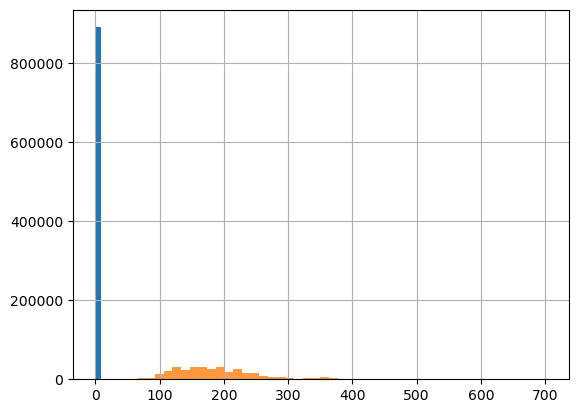

In [5]:
(ss_df['dist']).hist(bins=50, label="SS_Out")
stars_df['dist'].hist(bins=50, label="STARSS24", alpha=0.8)

<Axes: >

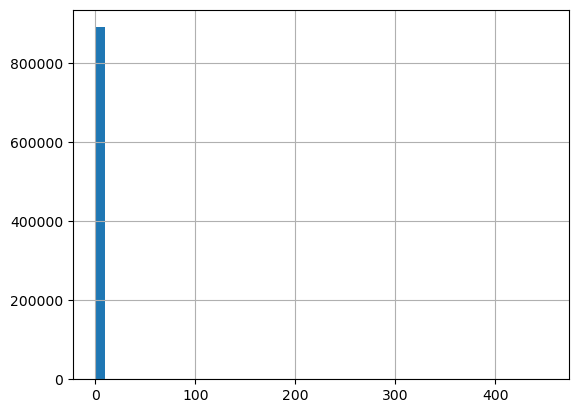

In [6]:
(ss_df['dist']).hist(bins=50, label="SS_Out")


In [7]:
def rescale_dist(label_dir, dset_dist, out_dir, label_format=['frame_no','class','source_no','azi','ele','dist']):
    for subdir in os.listdir(label_dir):
        glob_match = osp.join(label_dir, subdir, f'*.csv')
        print(f"Checking {glob_match}")
        files = glob.glob(glob_match)
        out_subdir = osp.join(out_dir, subdir)
        if not osp.exists(out_subdir):
            os.mkdir(out_subdir)
        print(f"Saving results to {out_subdir}")
        for file in files:
            filepath = osp.join(label_dir, subdir, file)
            assert osp.exists(filepath)
            file_df = pd.read_csv(filepath, header=0, names=label_format)
            outpath = osp.join(out_subdir, file.split('/')[-1])

            if (file_df['dist']<10).all():
                file_df['dist']*=100

            file_df.to_csv(outpath, index=False, header=False)
    return

In [8]:
ss_label_dir = "/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/"

ss_dist = {'fold1':[f'room{i}' for i in range(6)],
           'fold2':[f'room{i}' for i in range(3)]}

ss_outdir = "/scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev"

rescale_dist(ss_label_dir, ss_dist, ss_outdir)

Checking /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels/*.csv
Saving results to /scratch/ci411/SELD/seld_datasets/SSBaseline/metadata_dev/labels


In [9]:
ssr_label_dir = "/scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/"


ssr_df = build_ds_df(ssr_label_dir, ss_dist)

Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold1_room0_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold1_room1_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold1_room2_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold1_room3_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold1_room4_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold1_room5_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold2_room0_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold2_room1_*.csv
Checking /scratch/ci411/SELD/seld_datasets/SSBaseline_rescale/metadata_dev/labels/fold2_room2_*.csv


<Axes: >

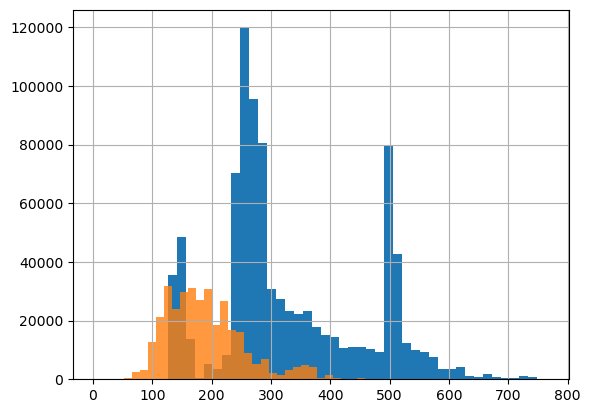

In [10]:
ssr_df['dist'].hist(bins=50, label="SS_Out")
stars_df['dist'].hist(bins=50, label="STARSS24", alpha=0.8)

In [11]:
ism_label_dir = "/scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/"

ism_dist = {'fold1':[f'room{i}' for i in range(6)],
           'fold2':[f'room{i}' for i in range(3)]}

ism_outdir = "/scratch/ci411/SELD/seld_datasets/ism_rescale/metadata_dev"

rescale_dist(ism_label_dir, ism_dist, ism_outdir)

Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/*.csv
Saving results to /scratch/ci411/SELD/seld_datasets/ism_rescale/metadata_dev/labels


In [79]:
ism_df = build_ds_df(ism_label_dir, ism_dist)

Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold1_room0_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold1_room1_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold1_room2_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold1_room3_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold1_room4_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold1_room5_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold2_room0_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold2_room1_*.csv
Checking /scratch/yw5759/Generated_HARP_FOA_SS_Rooms/metadata_dev/labels/fold2_room2_*.csv


In [18]:
stars_df.head()

,frame_no,class,source_no,azi,ele,dist,fold,room
0,11,1,1,34,-15,157,fold4,room2
1,12,1,1,34,-15,157,fold4,room2
2,13,1,1,34,-15,157,fold4,room2
3,14,1,1,34,-15,157,fold4,room2
4,15,1,1,34,-15,157,fold4,room2


In [69]:
bl_dir = "/scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev"

bl_dist = {'fold1':[f'room{i}' for i in range(6)],
           'fold2':[f'room{i}' for i in range(3)]}

bl_df = build_ds_df(bl_dir, bl_dist)

Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold1_room0_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold1_room1_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold1_room2_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold1_room3_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold1_room4_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold1_room5_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold2_room0_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold2_room1_*.csv
Checking /scratch/ci411/SELD/seld_datasets/DCASE2024_SELD_Dataset/metadata_dev/metadata/fold2_room2_*.csv


In [81]:
def triplot_df(df):
    for fold in df['fold'].unique():
        fold_df = df[df['fold']==fold]
        rooms = fold_df['room'].unique()
        for room in rooms:
            room_df = fold_df[fold_df['room']==room]
            x = room_df['dist'] * np.cos(2*np.pi * room_df['azi']/360) * np.sin(2*np.pi * room_df['ele']/360)
            y = room_df['dist'] * np.sin(2*np.pi * room_df['azi']/360) * np.sin(2*np.pi * room_df['ele']/360)
            z = room_df['dist'] * np.cos(2*np.pi * room_df['ele']/360)
        
            max_xy = np.max(np.concatenate([x,y]))
            max_xz = np.max(np.concatenate([x,z]))
            fig = plt.figure(figsize = (10,3))
            
            ax = []
            ax.append(fig.add_subplot(1, 3, 1))
            ax.append(fig.add_subplot(1, 3, 2))
            ax.append(fig.add_subplot(1, 3, 3, projection='3d'))
            
            ax[0].scatter(x,y, marker='.', alpha=0.8)
            ax[0].set_xlim([-max_xy, max_xy])
            ax[0].set_ylim([-max_xy, max_xy])
            ax[0].set_aspect('equal')
            ax[0].scatter(0,0, color='k', marker='x')
            ax[0].set_title("XY")
        
            ax[1].scatter(x,z, marker='.', alpha=0.8)
            ax[1].set_xlim([-max_xy, max_xy])
            ax[1].set_ylim([0, max_xz])
            ax[1].set_aspect('equal')
            ax[1].scatter(0,100, color='k', marker='x')
            ax[1].set_title("XZ")
        
            ax[2].scatter(0,0,100, color='k', marker='x')
            ax[2].scatter(x,y,z, marker='.', alpha=0.8)
            ax[2].set_xlim([-max_xy, max_xy])
            ax[2].set_ylim([-max_xy, max_xy])
            ax[2].set_zlim([0, max_xz])
            ax[2].set_aspect('equal')
            ax[2].set_title(f'{fold}_{room}')


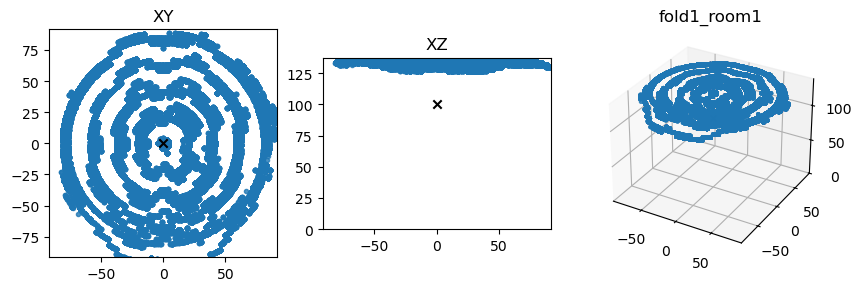

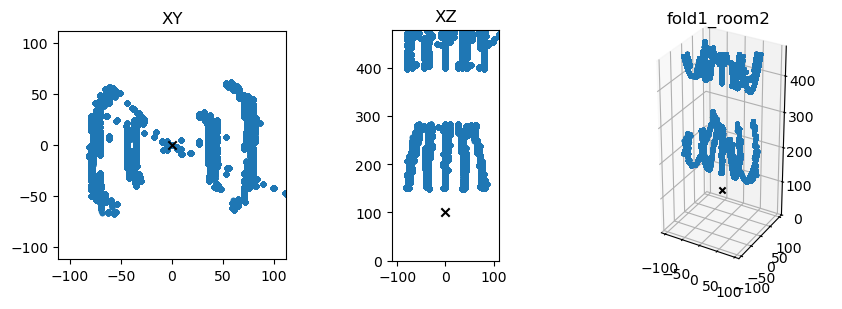

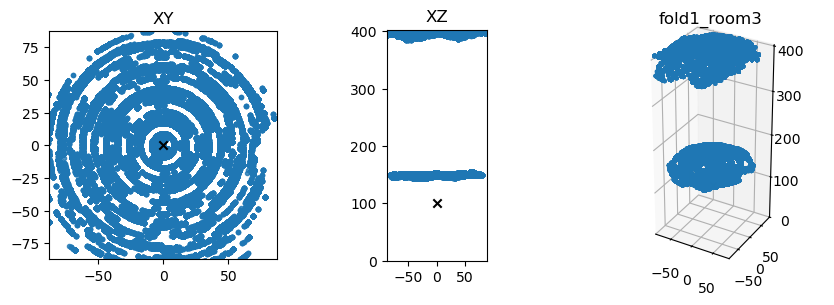

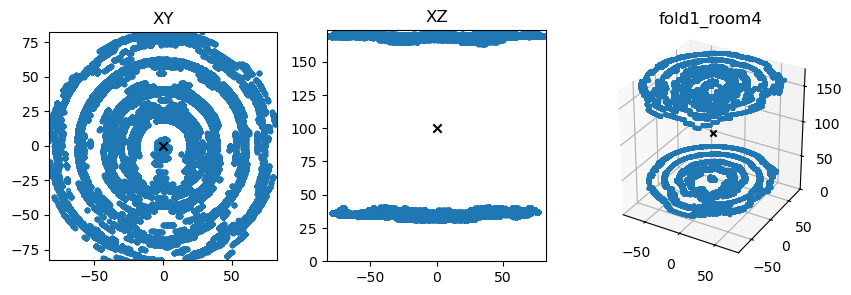

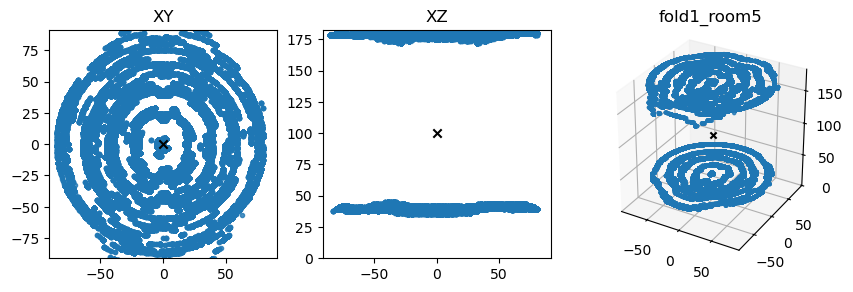

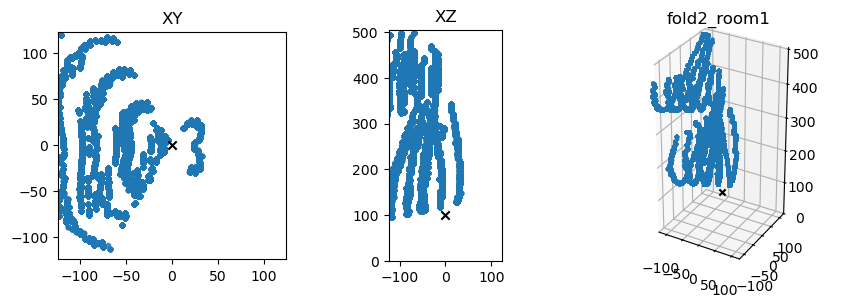

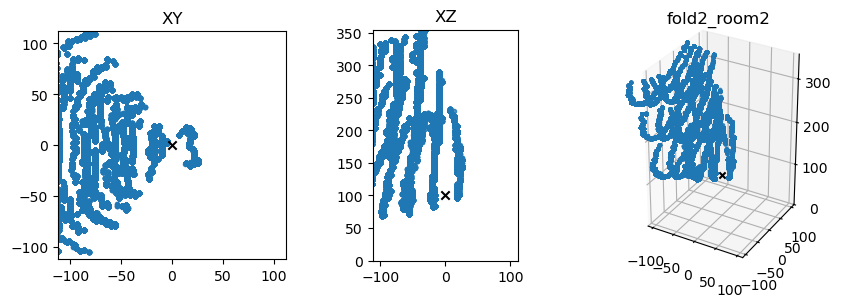

In [82]:
triplot_df(bl_df)

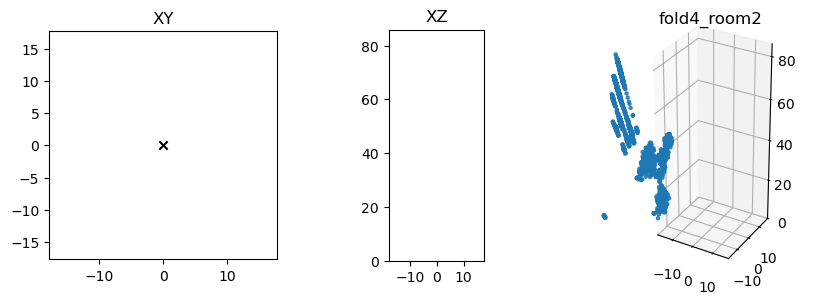

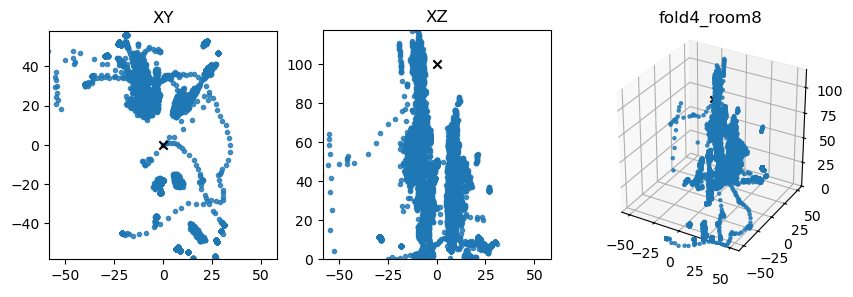

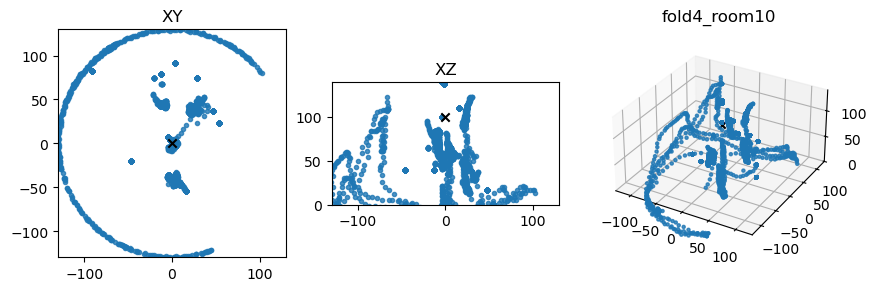

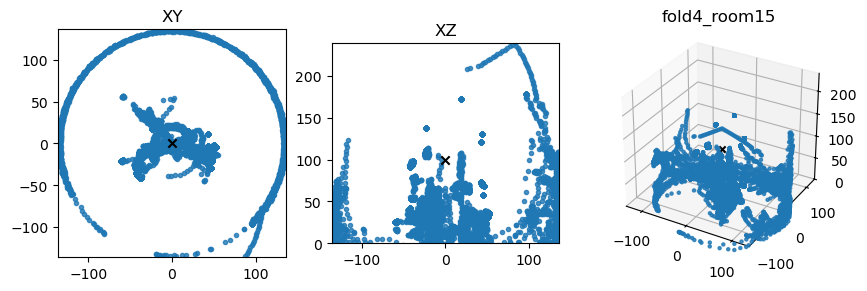

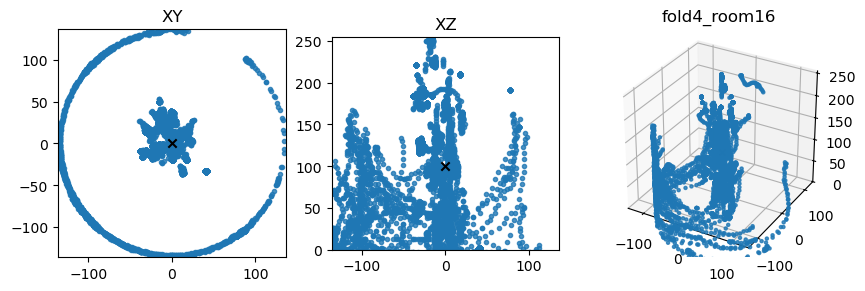

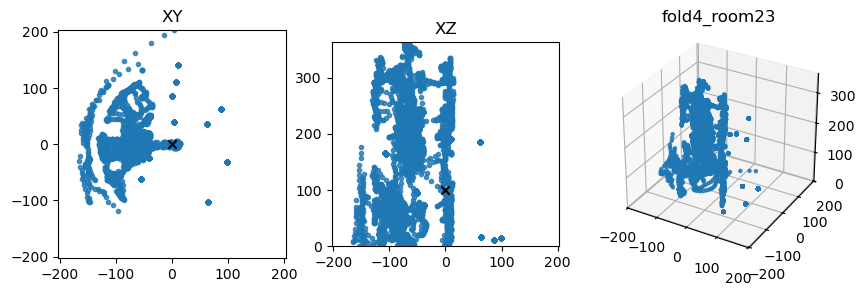

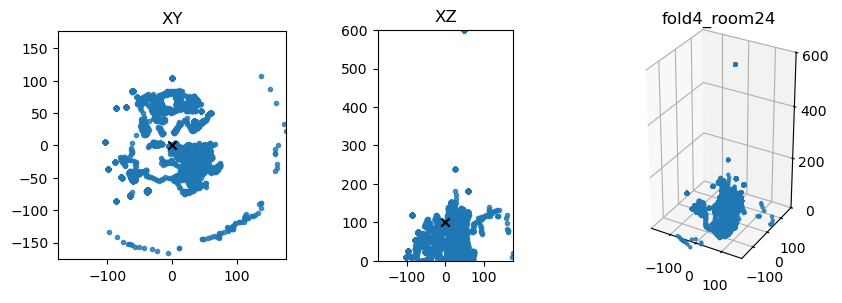

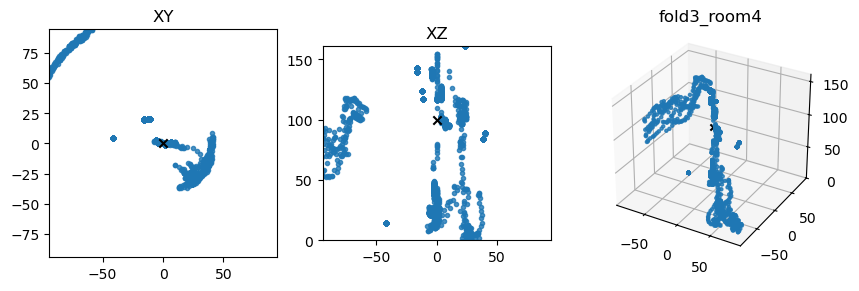

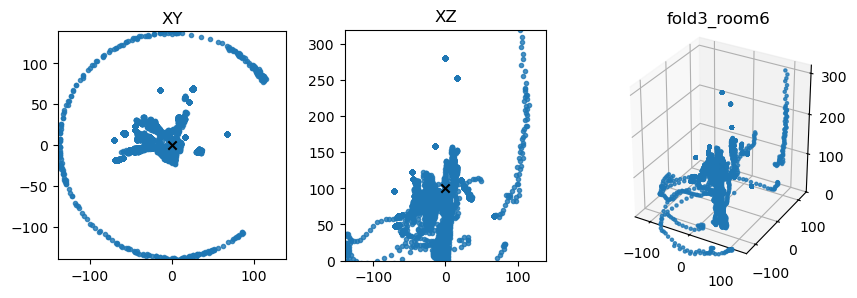

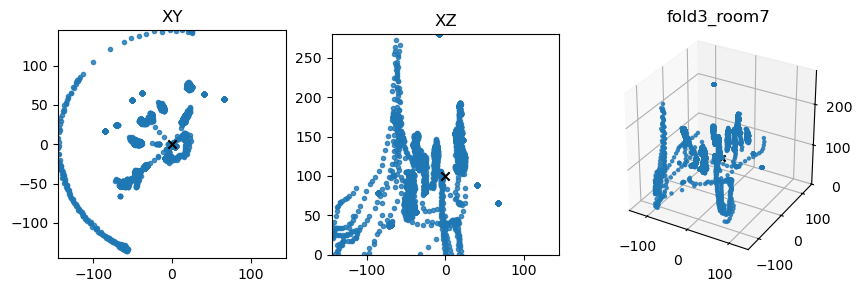

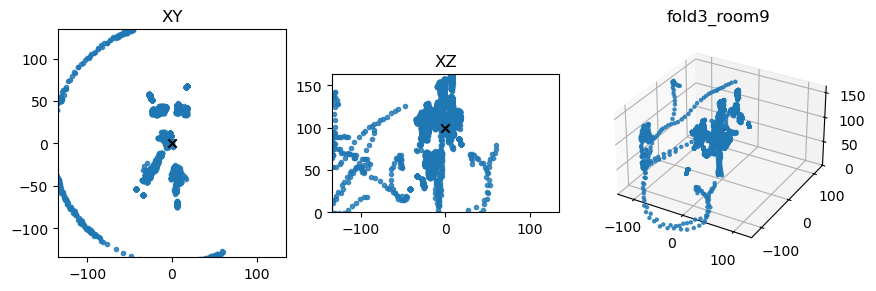

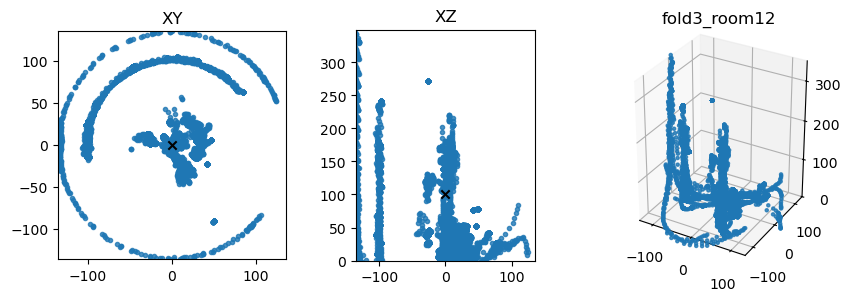

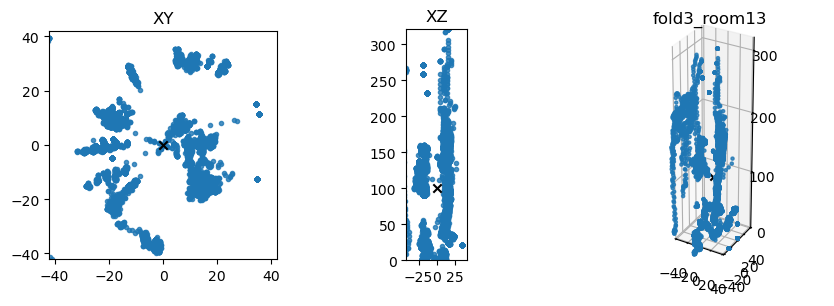

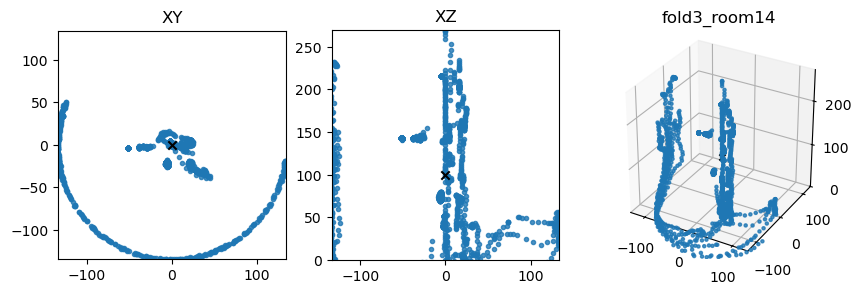

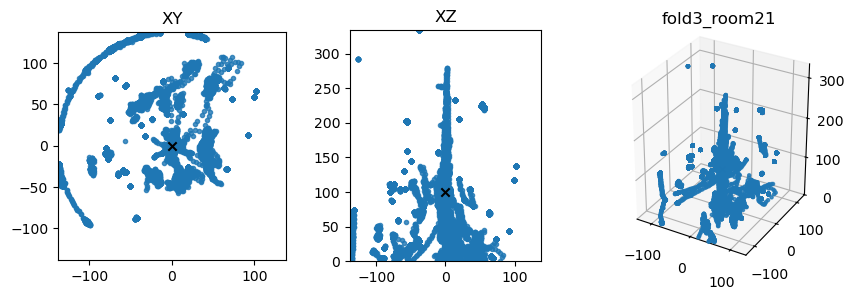

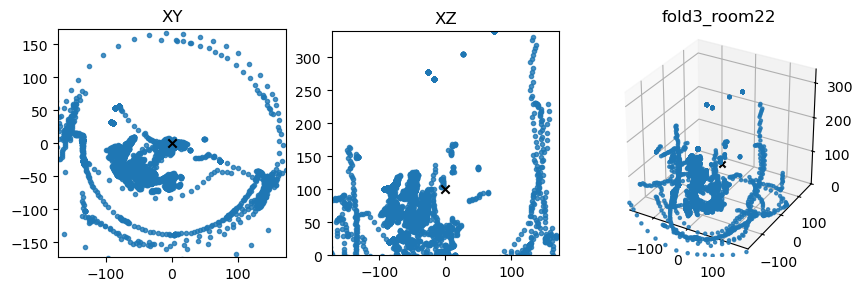

In [83]:
triplot_df(stars_df)

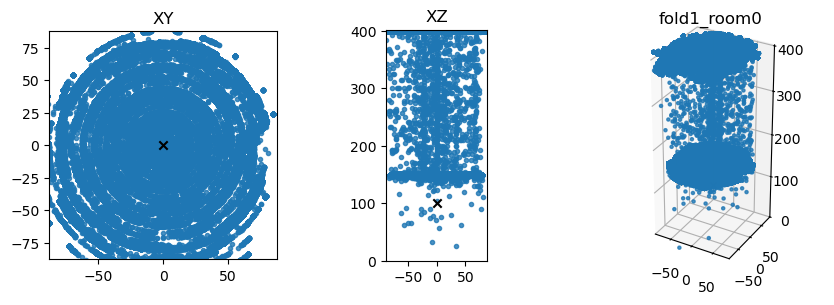

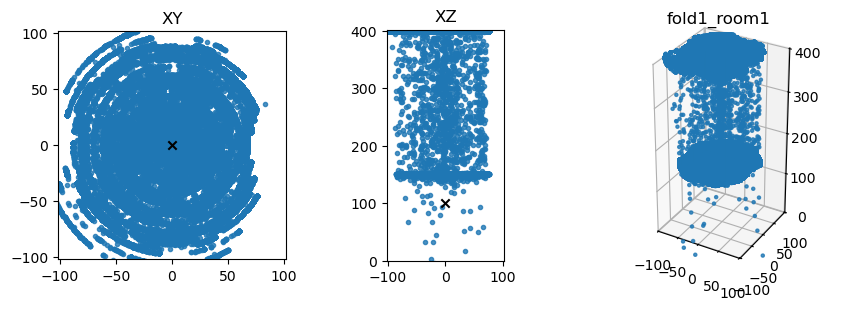

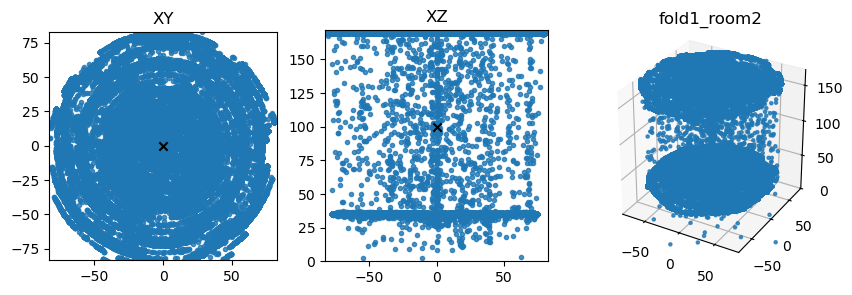

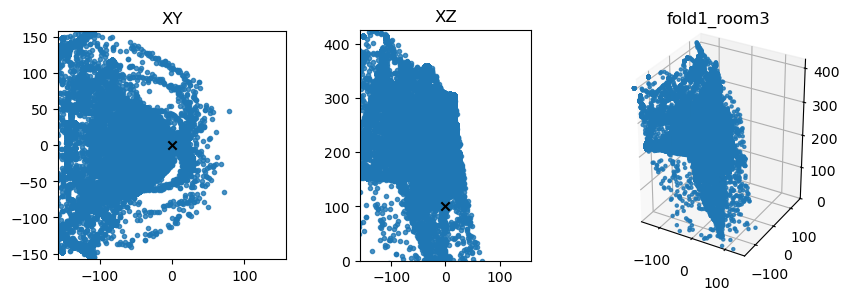

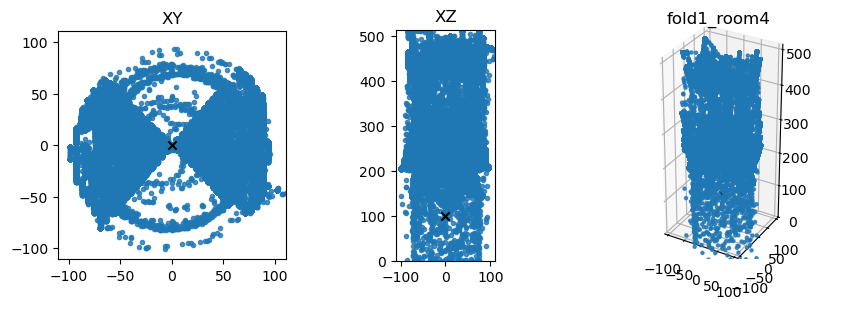

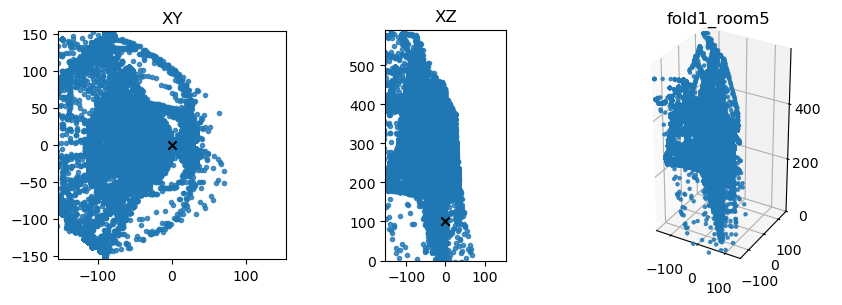

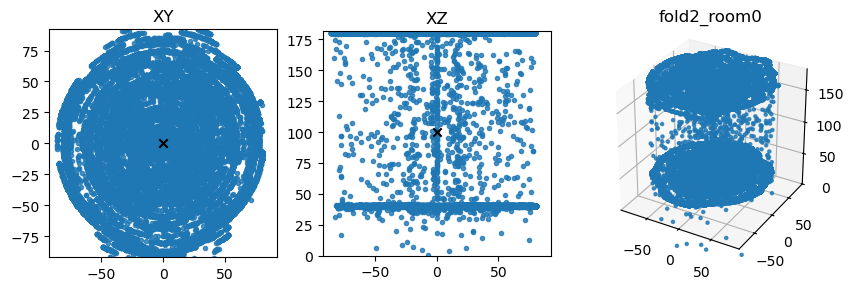

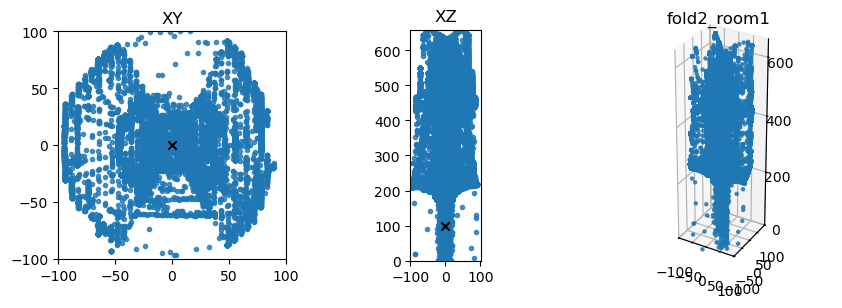

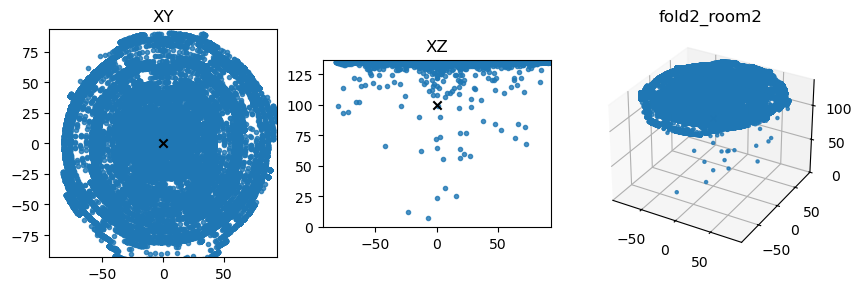

In [84]:
triplot_df(ssr_df)

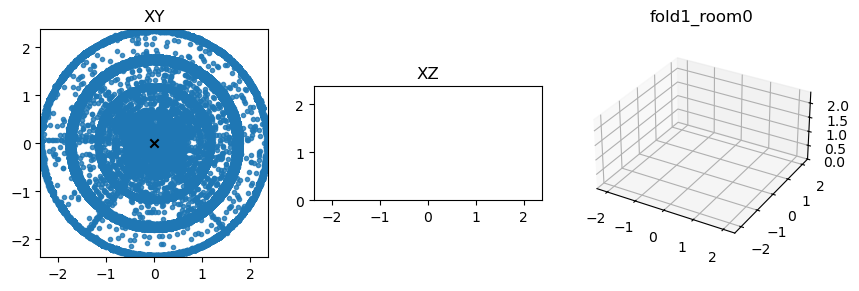

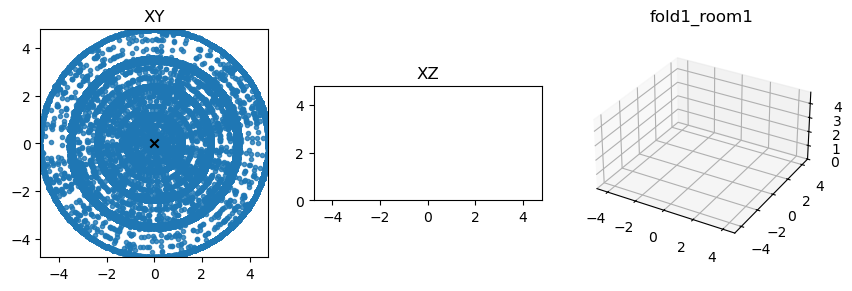

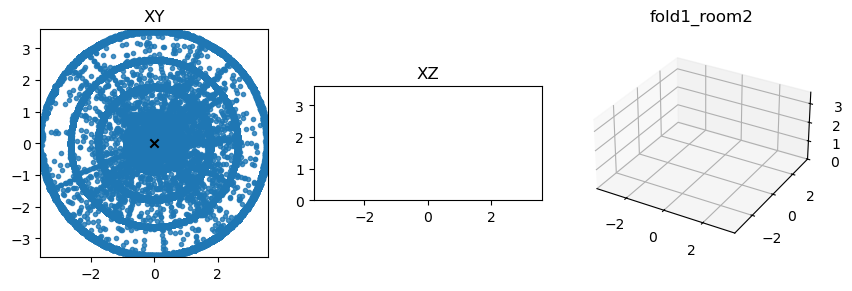

In [ ]:
triplot_df(ism_df)